In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set'
valid_path = r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 10s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob(r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set\*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11386 images belonging to 9 classes.


In [17]:
test_set = test_datagen.flow_from_directory(r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3416 images belonging to 9 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\karth\AppData\Local\Temp\ipykernel_1572\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
356/356 [==============================] - 597s 2s/step - loss: 2.1103 - accuracy: 0.7663 - val_loss: 1.3391 - val_accuracy: 0.8446
Epoch 2/10
356/356 [==============================] - 1192s 3s/step - loss: 1.3539 - accuracy: 0.8568 - val_loss: 1.2035 - val_accuracy: 0.8823
Epoch 3/10
356/356 [==============================] - 454s 1s/step - loss: 1.1277 - accuracy: 0.8849 - val_loss: 0.6367 - val_accuracy: 0.9251
Epoch 4/10
356/356 [==============================] - 556s 2s/step - loss: 1.3074 - accuracy: 0.8920 - val_loss: 0.9889 - val_accuracy: 0.9110
Epoch 5/10
356/356 [==============================] - 1085s 3s/step - loss: 1.2627 - accuracy: 0.9024 - val_loss: 0.4610 - val_accuracy: 0.9496
Epoch 6/10
356/356 [==============================] - 463s 1s/step - loss: 0.9980 - accuracy: 0.9173 - val_loss: 0.7354 - val_accuracy: 0.9420
Epoch 7/10
356/356 [==============================] - 364s 1s/step - loss: 0.9832 - accuracy: 0.9211 - val_loss: 1.2940 - val_accuracy: 0.91

In [19]:
import matplotlib.pyplot as plt

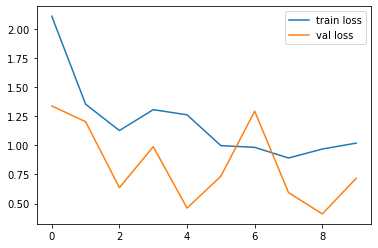

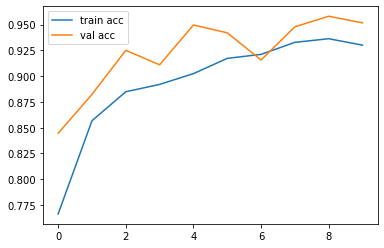

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [34]:
from tensorflow.keras.models import load_model
import h5py

model.save(r'C:\Users\karth\Downloads\Trained_model.h5')

In [23]:
y_pred = model.predict(test_set)

107/107 [==============================] - 74s 672ms/step


In [24]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9899465e-01, 1.0053891e-03, 4.6776601e-38, ..., 0.0000000e+00,
        3.1413567e-37, 2.0957832e-36],
       [0.0000000e+00, 0.0000000e+00, 5.6243938e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.3091524e-20, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        3.4307057e-21, 1.8676355e-20]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 0, 2, ..., 1, 8, 6], dtype=int64)